In [18]:
import numpy as np
import csv
import graph_tool as gt
import matplotlib.pyplot as plt
import graph_tool.stats as gts
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import time

In [19]:
#read labels
label_path = '/Users/endingalaporte/Desktop/degree_kernel/input/country_binary.txt'
text = open(label_path, encoding = 'utf-16')
reader = csv.reader(text, delimiter='\n')
labels = np.array([int(row[0]) for row in reader])

#open edgelist from txt and plot it in graph_tool

def string_to_list(string):
    """given a string of two elements, returns each element in a list"""
    return [int(string.split(' ')[0]), int(string.split(' ')[1])]

n = 136 #n cities

#get dataset of graphs
G_list = np.array([gt.Graph(directed = False) for i in range(n)], dtype = object)

o_f = '/Users/endingalaporte/Desktop/degree_kernel/input'
for i in range(n):
    open_path = o_f + "/edgelist_city"+str(i)+".txt"
    #print(open_path)
    text = open(open_path, 'r')
    reader = csv.reader(text, delimiter='\n')
    elist = [string_to_list(row[0]) for row in reader]
    G_list[i].add_edge_list(elist)
    #td.graph_draw(G, output_size = (300,300))


duration = 0.388535737991333


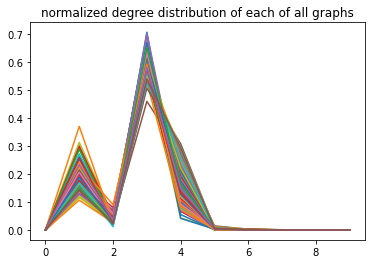

In [20]:
s = time.time()
##WWW NEED TO hist_d for right embedding#
#compute phi for each graph
n = len(G_list)

dist = [np.zeros(10) for i in range(n)]
plt.title("normalized degree distribution of each of all graphs")
for i in range(n):
    hist = gts.vertex_hist(G_list[i], deg = 'total')[0][0:10] #ce qu'il faut là c'est embed les histograms
    dist[i][0:len(hist)] = hist
    dist[i] = dist[i]/dist[i].sum()                             # dans des vecteurs plus grands
    plt.plot(dist[i])                                           #de sorte que les derniers termes be filled with 0
dist = np.array(dist)                                           #that, way, all vectors have same dimensions

#labels same size as dataset
labels = labels[0:len(G_list)]

#kernel matrix for degree kernel normalized
K = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        K[i,j] = np.dot(dist[i], dist[j])
        
print("duration =", time.time()-s)

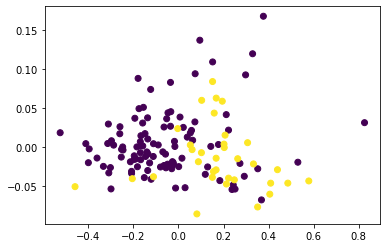

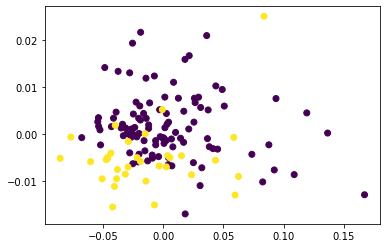

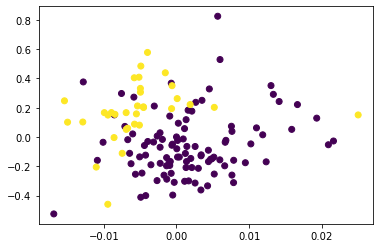

In [21]:
#project normalized degree kernel in two components using PCA

folder = '/Users/endingalaporte/Desktop/degree_kernel/output/'
reducer = PCA(n_components = 3)
embed = reducer.fit_transform(K)
plt.scatter(embed[:,0], embed[:,1], c = labels, marker = "o")
plt.savefig(folder + '12dim_pca_degree_kernel.svg')
plt.subplots()
plt.scatter(embed[:,1], embed[:,2], c = labels, marker = "o")
plt.savefig(folder + '23dim_pca_degree_kernel.svg')
plt.subplots()
plt.scatter(embed[:,2], embed[:,0], c = labels, marker = "o")
plt.savefig(folder + '31dim_pca_degree_kernel.svg')

/Users/endingalaporte/Documents/python/miniconda3/envs/jupyternotebookenv/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


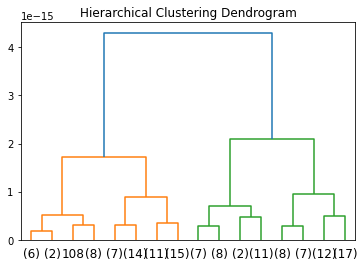

In [22]:
#dendogram using distance matrix

#distance matrix using degree kernel
D = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        D[i,j] = abs((dist[i]-dist[j]).sum())

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(D)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

all_phi = dist

silhouette_score(embed, labels), silhouette_score(all_phi, labels)

(0.23240011341963143, 0.21387716536593493)

In [24]:
K.shape

(136, 136)

In [25]:
D.shape

(136, 136)